## FDTD

In [9]:
### Imports
%load_ext autoreload
%autoreload 2

# Append main folder
import sys
sys.path.append("..")

import nidn
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Single layer TiO2

Configuring the simulation

In [10]:
cfg = nidn.load_default_cfg()
# Set the number of frequencies to simulate for
cfg.N_freq = 12
#Number of layers with materials
cfg.N_layers = 1
# Define the thickness of each layer
cfg.PER_LAYER_THICKNESS=[1.0]
#Smallest wavelength
cfg.physical_wavelength_range[0]=3e-7
#Largest wavelength
cfg.physical_wavelength_range[1]=1e-6
#Convert wavelengths to normalized frequencies used by the layer builder
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution,
)
# Init layer builder
layer_builder = nidn.LayerBuilder(cfg)
#init epsiln values
eps_grid = torch.zeros(1, 1, cfg.N_layers, cfg.N_freq, dtype=torch.cfloat)
# Set first layer to titanium oxide
eps_grid[:, :, 0, :] = layer_builder.build_uniform_layer("titanium_oxide")

# Choose FDTD method, TRCWA other option
cfg.solver = "FDTD"
# Set number of time steps in FDTD
cfg.FDTD_niter = 400
# Set number of decimal in printing
torch.set_printoptions(8)
# Choose pulse type
cfg.FDTD_pulse_type = 'continuous'
nidn.set_log_level('DEBUG')
cfg.FDTD_source_type = 'line'


12:44:36|NIDN-DEBUG| Found the following files
12:44:36|NIDN-DEBUG| ['c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_nitride.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_oxide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\gallium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\germanium.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\indium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\silicon_nitride.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\m

In [11]:
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)

12:44:36|NIDN-DEBUG| Using FDTD solver to find spectrum
12:44:36|NIDN-DEBUG| Wavelenghts in spectrum : 
12:44:36|NIDN-DEBUG| [1.00000000e-06 8.25000000e-07 7.02127660e-07 6.11111111e-07
 5.40983607e-07 4.85294118e-07 4.40000000e-07 4.02439024e-07
 3.70786517e-07 3.43750000e-07 3.20388350e-07 3.00000000e-07]
12:44:36|NIDN-DEBUG| Number of layers: 
12:44:36|NIDN-DEBUG| 1
  0%|          | 0/12 [00:00<?, ?it/s]12:44:36|NIDN-DEBUG| Simulating for wavelenght: 1e-06
12:44:36|NIDN-DEBUG| Initializing FDTD grid with size 176 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
12:44:38|NIDN-DEBUG| Initializing FDTD grid with size 176 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
  8%|▊         | 1/12 [00:04<00:45,  4.11s/it]12:44:40|NIDN-DEBUG| Simulating for wavelenght: 8.249999999999999e-07
12:44:40|NIDN-DEBUG| Initializing FDTD grid with size 176 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
12:

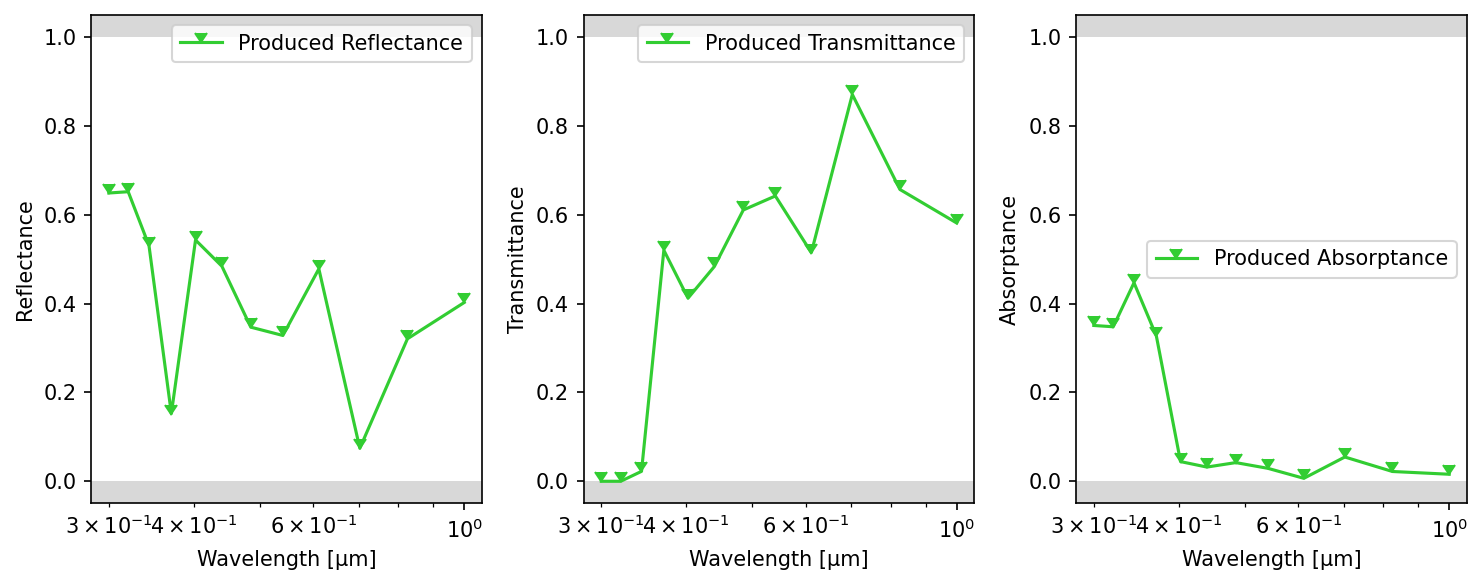

In [12]:
#Plot the spectrum
nidn.plot_spectrum(cfg,R,T)

In [16]:
print("R = [")
[print(f"{r.item():.8f}",end=",") for r in R]
print("]")
print("T = [")
[print(f"{t.item():.8f}",end=",") for t in T]
print("]")

R = [
0.40261049,0.32084672,0.07427883,0.47833851,0.32833791,0.34704272,0.48433127,0.54331969,0.15242272,0.53059470,0.65206382,0.64915042,]
T = [
0.58156759,0.65711033,0.87105390,0.51499648,0.64248542,0.61090019,0.48366068,0.41236152,0.52027404,0.02235526,0.00000531,0.00000049,]


## Multiple layers

In [13]:
cfg = nidn.load_default_cfg()
# Set the number of frequencies to simulate for
cfg.N_freq = 50
#Number of layers with materials
cfg.N_layers = 3
# Define the thickness of each layer, in default units
cfg.PER_LAYER_THICKNESS=[1.0, 0.5, 1.2]
#Smallest wavelength
cfg.physical_wavelength_range[0]=3e-7
#Largest wavelength
cfg.physical_wavelength_range[1]=9e-7
#init epsiln values
eps_grid = torch.zeros(1, 1, cfg.N_layers, cfg.N_freq, dtype=torch.cfloat)
#Convert wavelengths to normalized frequencies used by the layer builder
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution,
)
# Choose FDTD method, TRCWA other option
cfg.solver = "FDTD"
# Init layer builder
layer_builder = nidn.LayerBuilder(cfg)
# Set the three layers to the desired material
eps_grid[:, :, 0, :] = layer_builder.build_uniform_layer("titanium_oxide")
eps_grid[:, :, 1, :] = layer_builder.build_uniform_layer("gallium_arsenide")
eps_grid[:, :, 2, :] = layer_builder.build_uniform_layer("silicon_nitride")
# Set number of time steps in FDTD
cfg.FDTD_niter = 800
# Set number of decimal in printing
torch.set_printoptions(8)
# Choose pulse type
cfg.FDTD_pulse_type = 'continuous'

12:45:26|NIDN-DEBUG| Found the following files
12:45:26|NIDN-DEBUG| ['c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_nitride.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_oxide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\gallium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\germanium.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\indium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\silicon_nitride.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\m

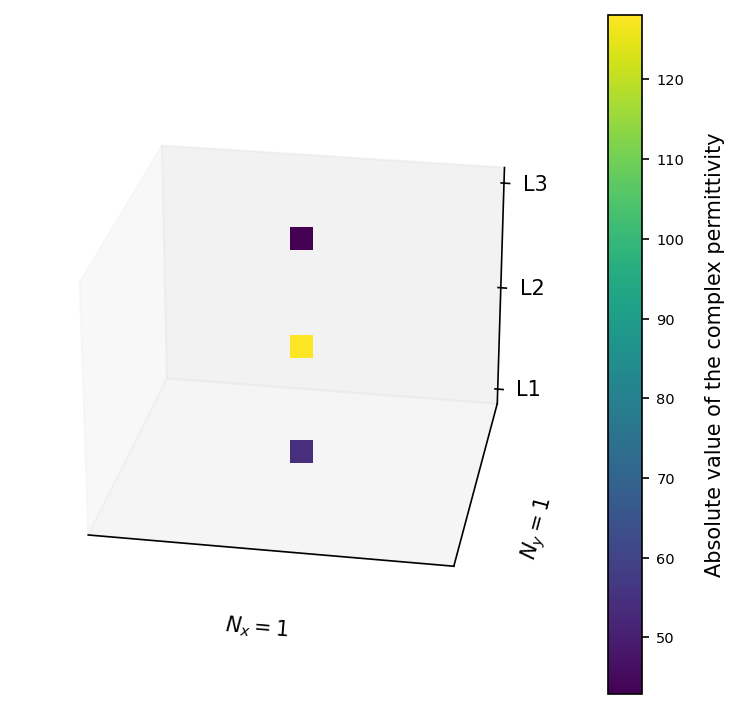

In [14]:
# Plot the abs values of the produced grid
nidn.plot_epsilon_grid(eps_grid,cfg)

In [15]:
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)

12:45:27|NIDN-DEBUG| Using FDTD solver to find spectrum
12:45:27|NIDN-DEBUG| Wavelenghts in spectrum : 
12:45:27|NIDN-DEBUG| [9.00000000e-07 8.64705882e-07 8.32075472e-07 8.01818182e-07
 7.73684211e-07 7.47457627e-07 7.22950820e-07 7.00000000e-07
 6.78461538e-07 6.58208955e-07 6.39130435e-07 6.21126761e-07
 6.04109589e-07 5.88000000e-07 5.72727273e-07 5.58227848e-07
 5.44444444e-07 5.31325301e-07 5.18823529e-07 5.06896552e-07
 4.95505618e-07 4.84615385e-07 4.74193548e-07 4.64210526e-07
 4.54639175e-07 4.45454545e-07 4.36633663e-07 4.28155340e-07
 4.20000000e-07 4.12149533e-07 4.04587156e-07 3.97297297e-07
 3.90265487e-07 3.83478261e-07 3.76923077e-07 3.70588235e-07
 3.64462810e-07 3.58536585e-07 3.52800000e-07 3.47244094e-07
 3.41860465e-07 3.36641221e-07 3.31578947e-07 3.26666667e-07
 3.21897810e-07 3.17266187e-07 3.12765957e-07 3.08391608e-07
 3.04137931e-07 3.00000000e-07]
12:45:27|NIDN-DEBUG| Number of layers: 
12:45:27|NIDN-DEBUG| 3
  0%|          | 0/50 [00:00<?, ?it/s]12:45:27|N

KeyboardInterrupt: 

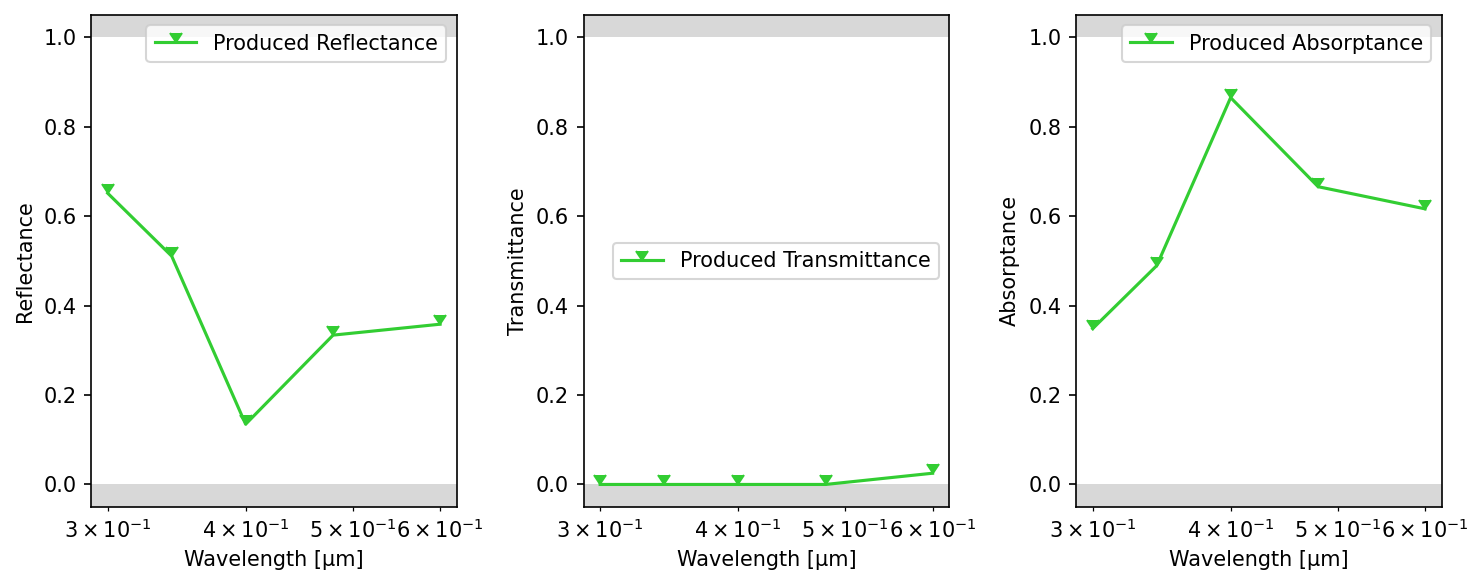

In [ ]:
#Plot the spectrum
nidn.plot_spectrum(cfg,R,T)